# Asymptotic of Distribution Example B

In [22]:
import importlib

import sympy as sp

from matplotlib import pyplot as plot
from scipy.optimize import fsolve
from math import log

from LocUtil import Grid1, MinMax

import DistExampB
import Map

In [28]:
dist = DistExampB.ExampB()
xSym = dist.xSym

#### Constants

In [40]:
nSamp = 100
nSinc = 8

nPlot = 101
figSize = (9, 6.5)

qMin = 0.0001
qMax = 0.9999

#### Basic Plots

Text(0, 0.5, 'PDF')

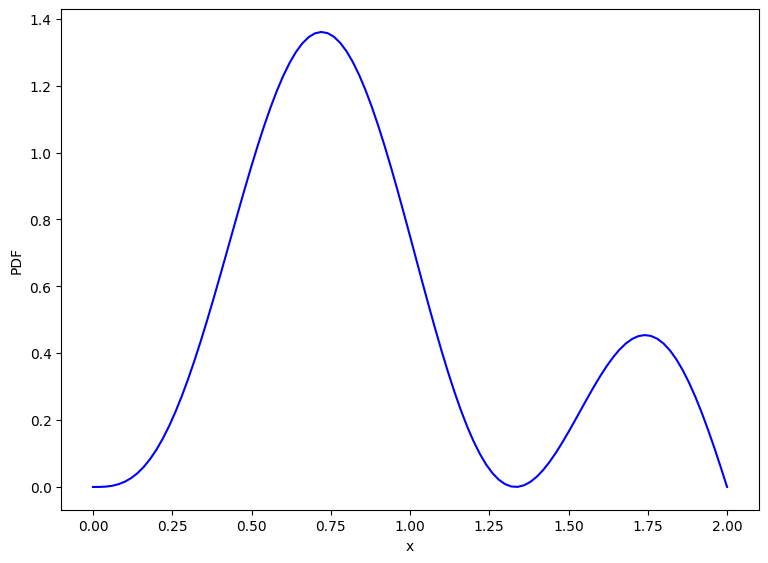

In [30]:
fig,ax = plot.subplots(1,1, figsize=figSize)

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid,pdfGrid, c='blue')

plot.xlabel('x')
plot.ylabel('PDF')

Text(0, 0.5, 'CDF')

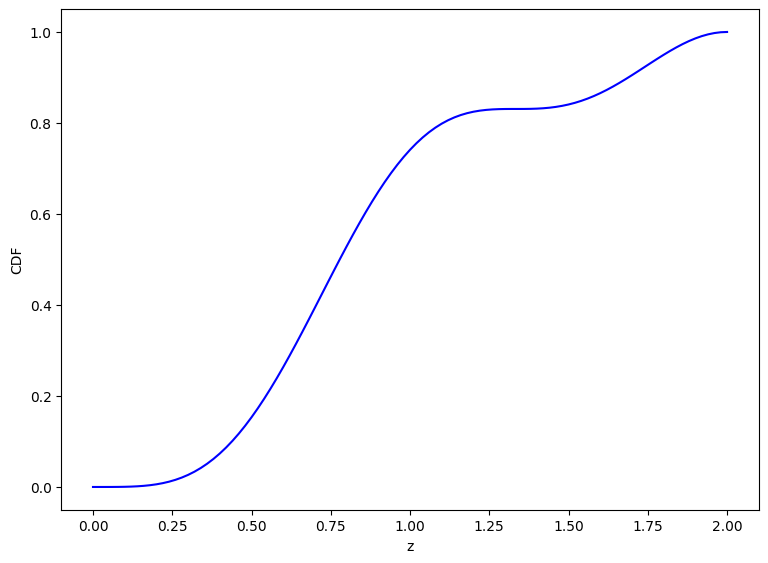

In [31]:
fig,ax = plot.subplots(1,1, figsize=figSize)

cdfX = [dist.Cdf(xV) for xV in xGrid]
plot.plot(xGrid,cdfX, c='blue')

plot.xlabel('x')
plot.ylabel('CDF')

### Map from x to z

In [52]:
zSym = sp.Symbol('z')

mapProb = Map.LogRatio(xSym,zSym, (0,2))
mapProb.forSym

log(x/(2 - x))

In [55]:
CdfZ = lambda z: dist.Cdf(mapProb.Inverse(z))

In [57]:
zMin = fsolve(lambda z: CdfZ(z) - qMin, 0)[0]
zMin

-3.3076903321343174

In [58]:
zMax = fsolve(lambda z: CdfZ(z) - qMax, 0)[0]
zMax

5.495495682069738

In [59]:
ArcTan = lambda q: log(q / (1 - q))

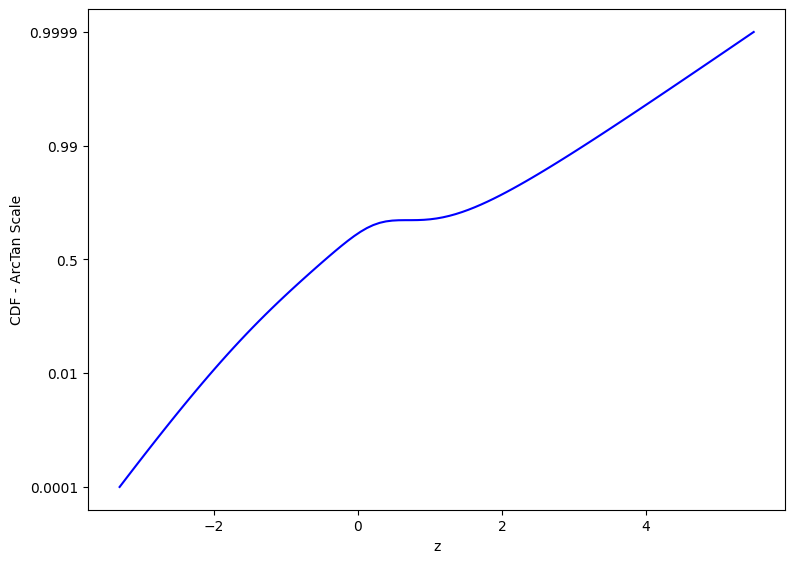

In [61]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfZ = [dist.Cdf(mapProb.Inverse(z)) for z in zGrid]

cdfZAtan = [ArcTan(q) for q in cdfZ]
plot.plot(zGrid,cdfZAtan, c='blue')

plot.xlabel('z')
plot.ylabel('CDF - ArcTan Scale')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [ArcTan(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## Asymptotes

### Asymptotes of PDF

In [ ]:
dist.pdfSym

#### Left

In [99]:
leftSeries = sp.series(dist.pdfSym, x=xSym, x0=0)
leftSeries

27*pi**2*x**3/16 - 27*pi**2*x**4/32 - 81*pi**4*x**5/256 + O(x**6)

In [111]:
leftCoef = tuple(leftSeries.coeff(xSym, k) for k in range(6))
leftCoef

(0, 0, 0, 27*pi**2/16, -27*pi**2/32, -81*pi**4/256)

In [113]:
leftNonZero = tuple((i,c) for (i,c) in enumerate(leftCoef) if c != 0)
leftNonZero

((3, 27*pi**2/16), (4, -27*pi**2/32), (5, -81*pi**4/256))

In [116]:
leftAsym = leftNonZero[0][1] * xSym ** leftNonZero[0][0]
leftAsym

27*pi**2*x**3/16

#### Right

In [121]:
rightSeries = sp.series(dist.pdfSym, x=xSym, x0=2)
rightSeries

6 - 3*(x - 2)**2/2 + 27*pi**2*(x - 2)**3/16 + 27*pi**2*(x - 2)**4/32 - 81*pi**4*(x - 2)**5/256 - 3*x + O((x - 2)**6, (x, 2))

In [141]:
ySym = sp.Symbol('y')
rightYSeries = rightSeries.subs(xSym, ySym + 2)
rightYSeries

-3*y - 3*y**2/2 + 27*pi**2*y**3/16 + 27*pi**2*y**4/32 - 81*pi**4*y**5/256 + O(y**6)

In [142]:
rightCoef = tuple(rightYSeries.coeff(ySym, k) for k in range(6))
rightCoef

(0, -3, -3/2, 27*pi**2/16, 27*pi**2/32, -81*pi**4/256)

In [143]:
rightNonZero = tuple((i,c) for (i,c) in enumerate(rightCoef) if c != 0)
rightNonZero

((1, -3), (2, -3/2), (3, 27*pi**2/16), (4, 27*pi**2/32), (5, -81*pi**4/256))

In [170]:
rightAsym = rightNonZero[0][1] * (xSym - 2) ** rightNonZero[0][0]
rightAsym

6 - 3*x

#### Plot

In [171]:
leftMaxX = fsolve(sp.lambdify(xSym, leftAsym - 1), 1)[0]
leftMaxX

0.3915784873288213

In [174]:
rightMinX = fsolve(sp.lambdify(xSym, rightAsym - 1), 1)[0]
rightMinX

1.6666666666666667

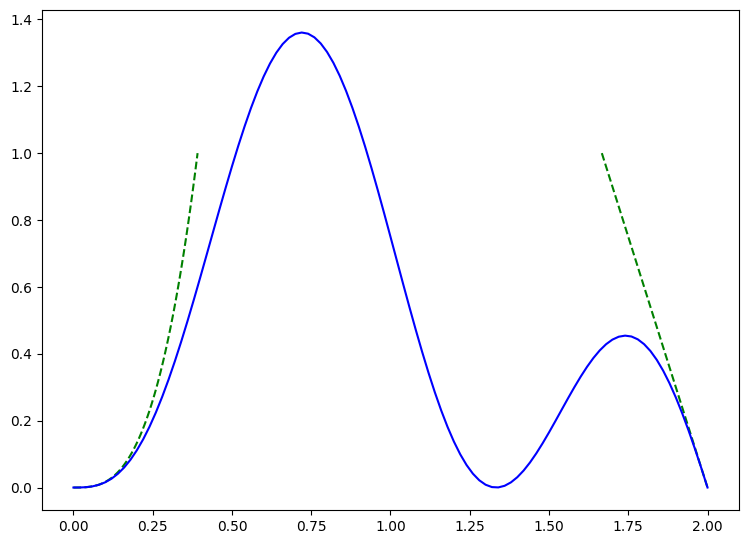

In [175]:
fig,ax = plot.subplots(1,1, figsize=figSize)

leftGrid = Grid1(0,leftMaxX, nPlot)
leftAsymX = [leftAsym.subs(xSym, x).evalf() for x in leftGrid]
plot.plot(leftGrid, leftAsymX, '--', c='green')

rightGrid = Grid1(rightMinX,2, nPlot)
rightAsymX = [rightAsym.subs(xSym, x).evalf() for x in rightGrid]
plot.plot(rightGrid, rightAsymX, '--', c='green')

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid, pdfGrid, c='blue')

### Asymptote of CDF in Terms of x

#### The Symbolic Expresions

In [219]:
leftAsymCdfSym = sp.integrate(leftAsym, xSym)
leftAsymCdfSym

27*pi**2*x**4/64

5 - 3*x

In [234]:
temp = sp.integrate(rightAsym, xSym)
rightAsymCdfSym = 1 + temp - temp.subs(xSym,2)
rightAsymCdfSym

-3*x**2/2 + 6*x - 5

#### plot

In [221]:
leftMaxX = fsolve(sp.lambdify(xSym, leftAsymCdfSym - 0.5), 1)[0]
leftMaxX

0.5886696116323754

In [230]:
rightMaxX = fsolve(sp.lambdify(xSym, rightAsymCdfSym - 0.5), 1)[0]
rightMaxX

1.4226497308103743

Text(0, 0.5, 'Quantile')

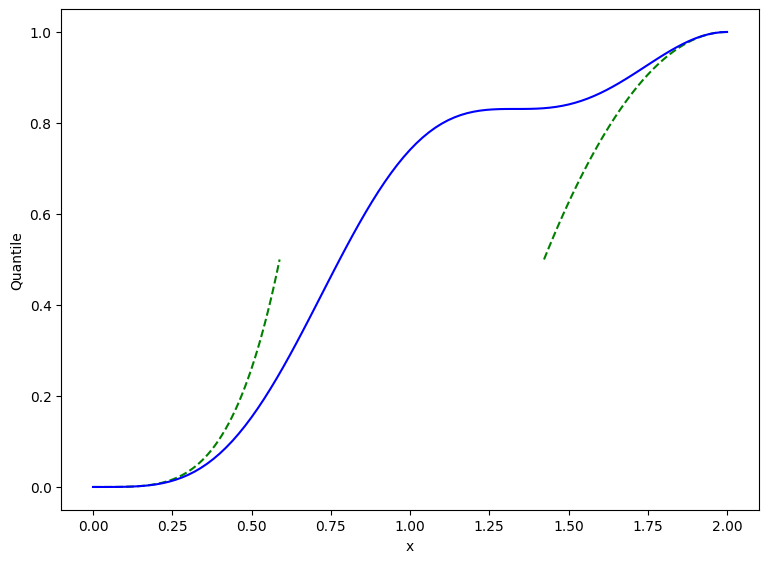

In [235]:
fig,ax = plot.subplots(1,1, figsize=figSize)

asymGrid = Grid1(rightMaxX, 2, nPlot)
gridAsym = [rightAsymCdfSym.subs(xSym, x) for x in asymGrid]
plot.plot(asymGrid,gridAsym, '--', c='green')

leftGrid = Grid1(0, leftMaxX, nPlot)
leftAsymAtan = [leftAsymCdfSym.subs(xSym, x) for x in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

xGrid = Grid1(0,2, nPlot)
cdfX = [dist.Cdf(x) for x in xGrid]
plot.plot(xGrid,cdfX, c='blue')

plot.xlabel('x')
plot.ylabel('Quantile')

### Asymptotices of CDF in terms of z

#### Left End

In [237]:
mapProb.invSym

2*exp(z)/(exp(z) + 1)

In [238]:
mapInvLeft = 2 * sp.exp(zSym)
mapInvLeft

2*exp(z)

In [240]:
leftAsymCdfZSym = leftAsymCdfSym.subs(xSym, mapInvLeft).simplify()
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

#### Right End

In [242]:
mapProb.invSym

2*exp(z)/(exp(z) + 1)

In [248]:
term0 = sp.limit(mapProb.invSym, z=zSym, z0=sp.oo)
term0

2

In [253]:
res0 = (term0 - mapProb.invSym).simplify()
res0

2/(exp(z) + 1)

In [257]:
term1 = 2*sp.exp(-zSym)
term1

2*exp(-z)

In [263]:
res1 = (res0 - term1).simplify()
res1

-2*exp(-z)/(exp(z) + 1)

In [264]:
term2 = -2*sp.exp(-2*zSym)

In [262]:
mapInvRight = term0 + term1 
mapInvRight

2 + 2*exp(-z)

In [265]:
rightAsymCdfZSym = rightAsymCdfSym.subs(xSym, mapInvRight).simplify()
rightAsymCdfZSym

1 - 6*exp(-2*z)

#### plot

In [271]:
leftMaxZ = fsolve(sp.lambdify(zSym, leftAsymCdfZSym - 0.5), 0)[0]
leftMaxZ

-1.2230373642857555

In [272]:
rightMaxZ = fsolve(sp.lambdify(zSym, rightAsymCdfZSym - 0.5), 0)[0]
rightMaxZ

1.2424533248940002

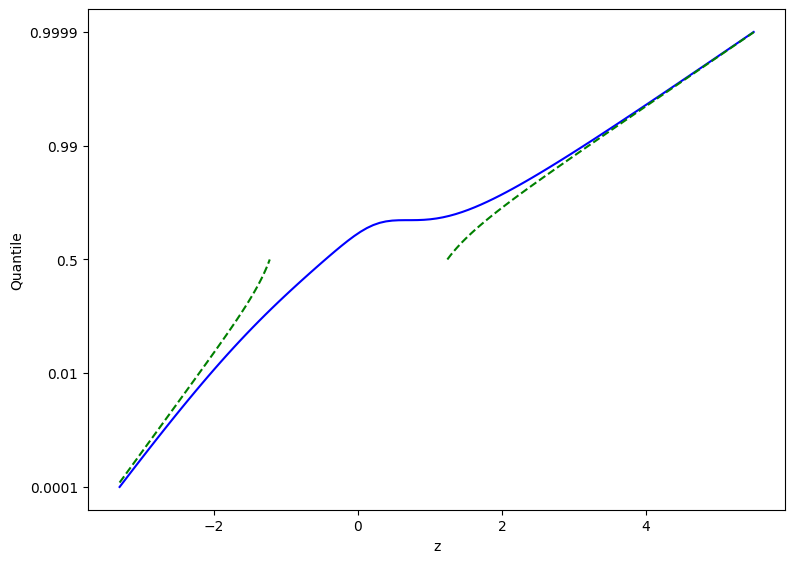

In [276]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [ArcTan(dist.Cdf(mapProb.invSym.subs(zSym, z).evalf())) for z in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

leftGrid = Grid1(zMin, leftMaxZ, nPlot)
leftAsymAtan = [ArcTan(leftAsymCdfZSym.subs(zSym, z)) for z in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

rightGrid = Grid1(rightMaxZ, zMax, nPlot)
rightAsymAtan = [ArcTan(rightAsymCdfZSym.subs(zSym, z)) for z in rightGrid]
plot.plot(rightGrid,rightAsymAtan, '--', color='green')

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [ArcTan(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## Construct the Nullifier

In [40]:
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [41]:
rightAsymCdfZSym

1 - 6*exp(-2*z)

In [279]:
a0 = 27 * sp.pi**2 / 4
a1 = 4
b0 = 6
b1 = 2

In [280]:
nullZ = \
	(sp.exp((a1 + b1)*zSym) + a0 * sp.exp(a1*zSym)) / \
	(sp.exp((a1 + b1)*zSym) + (a0 + b0) * sp.exp(a1*zSym) + 1)
nullZ

(exp(6*z) + 27*pi**2*exp(4*z)/4)/(exp(6*z) + (6 + 27*pi**2/4)*exp(4*z) + 1)

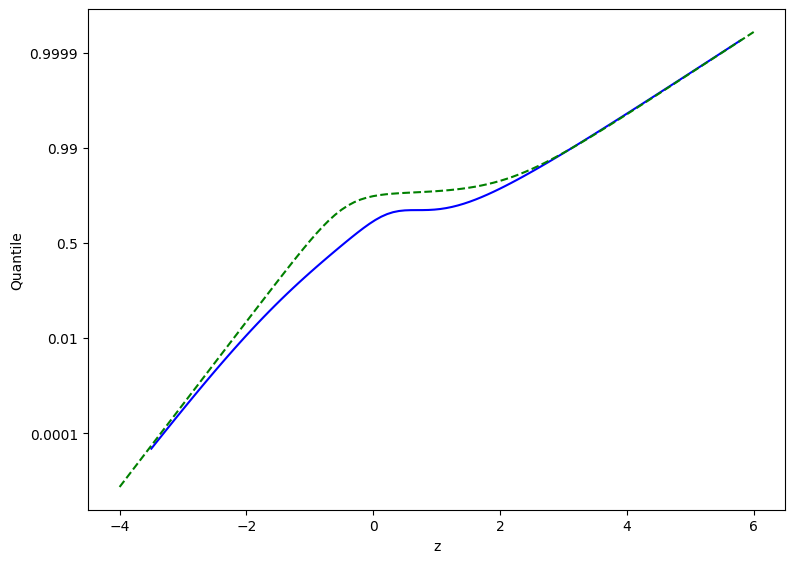

In [49]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [phiQ(dist.Cdf(invExp.subs(z,zV).evalf())) for zV in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

zGrid = Grid1(-4,6, nPlot)
nullGrid = [nullZ.subs(z, zV).evalf() for zV in zGrid]
nullGridAtan = [phiQ(q) for q in nullGrid]

plot.plot(zGrid,nullGridAtan, '--',c="green")

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [phiQ(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

### Graph Residual

In [56]:
Resid = lambda zV: dist.Cdf(invExp.subs(z,zV).evalf()) - nullZ.subs(z,zV).evalf()

TODO:  this doesn't lambdify cleanly

Text(0, 0.5, 'Residual')

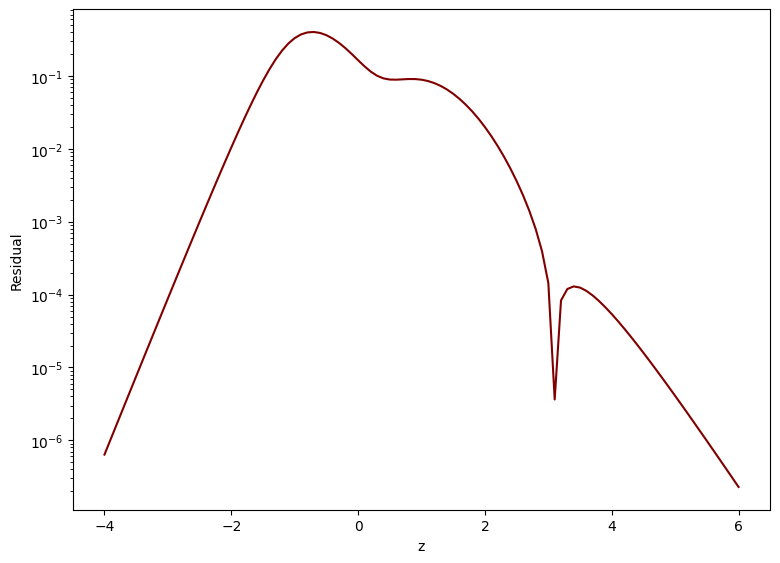

In [63]:
fig,ax = plot.subplots(1,1, figsize=figSize)

resZ = [Resid(zV) for zV in zGrid]
absResZ = [abs(r) for r in resZ]

plot.semilogy(zGrid, absResZ, c="maroon")

plot.xlabel('z')
plot.ylabel('Abs. of Residual')